In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 4\11-Apr-2023 Instacart Basket Analysis'

In [3]:
# importing the new dataset orders_products_aggregated
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

<Axes: >

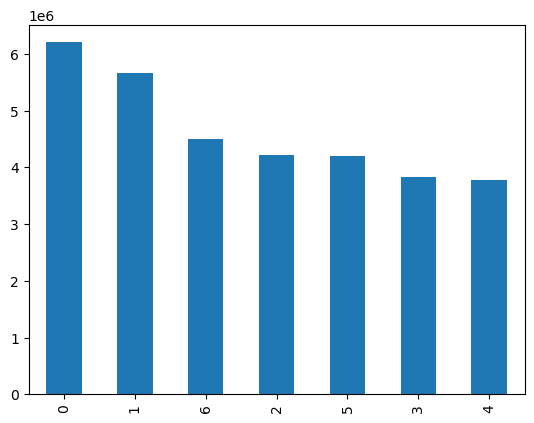

In [4]:
# Create a bar chart
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

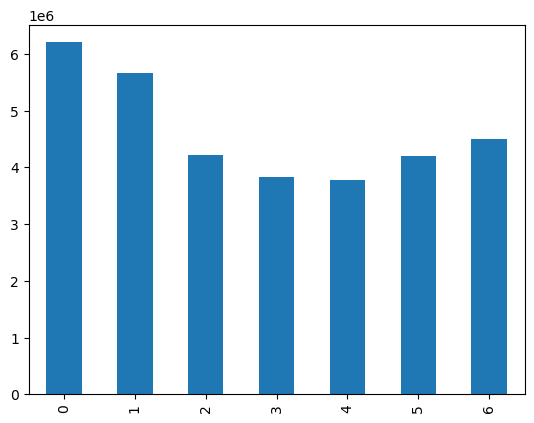

In [5]:
# To set the bar chart in chronological order of days of week
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

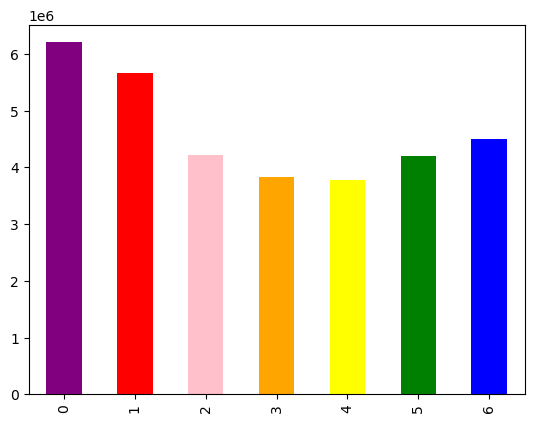

In [8]:
# changing color of bar chart
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# saving the bar chart as image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

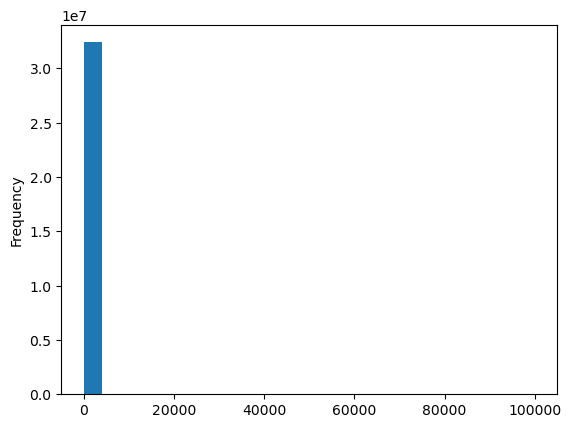

In [11]:
# Creating histogram
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
df_ords_prods_merge['prices'].mean()

11.980225638383468

In [16]:
df_ords_prods_merge['prices'].median()

7.4

In [17]:
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

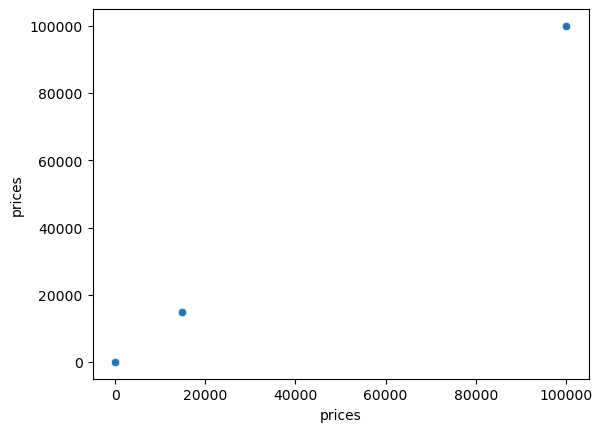

In [18]:
#Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [20]:
# identifying products with greater than $100 value
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest day,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy day,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy day,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [21]:
# marking above $100 product as missing, as it doesn't make sense for a supermarket to have single product of more $100 value
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
df_ords_prods_merge['prices'].max()

25.0

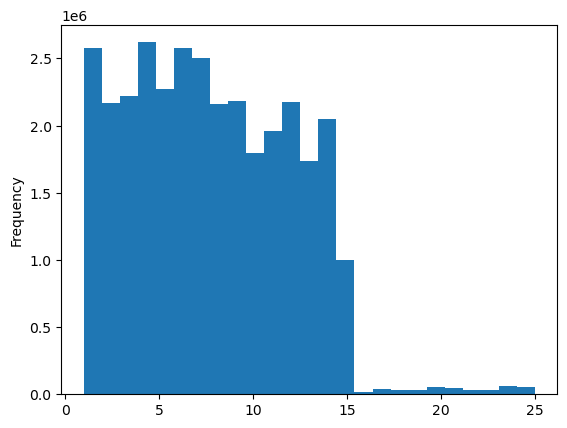

In [23]:
# creating histogram on clean data
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

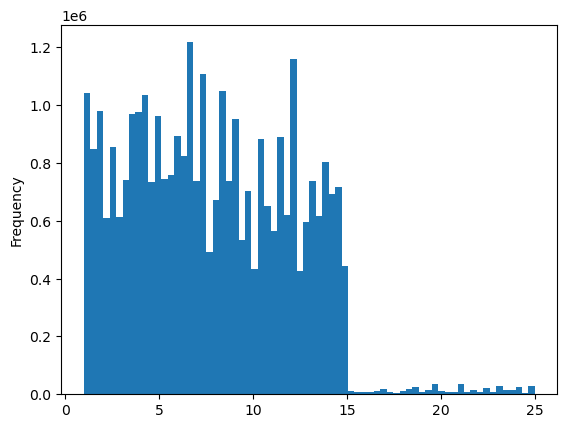

In [24]:
hist_2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
# saving the histogram as image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_orders.png'))

In [27]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [30]:
#Store 70% af data in big
big = df_ords_prods_merge[dev]

In [31]:
#Store 30% af data in big
small = df_ords_prods_merge[~dev]

In [32]:
len(big)

22683761

In [33]:
len(small)

9721098

In [34]:
len(big)+len(small)

32404859

In [35]:
len(df_ords_prods_merge)

32404859

In [36]:
#This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from small subset.
df_2 = small[['orders_day_of_week','prices']]

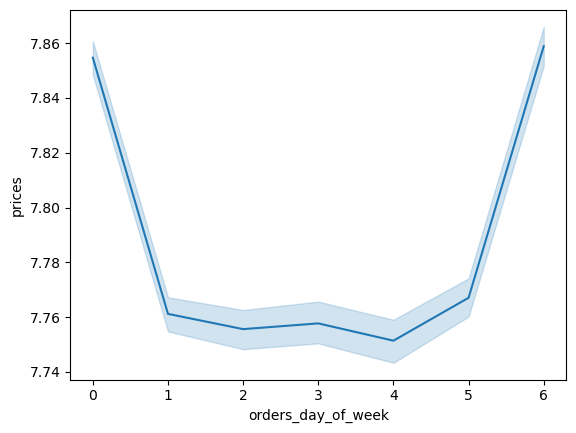

In [37]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')